### Multivariate Normal Distribution: Marginals

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dist = torch.distributions

In [19]:
prior = dist.MultivariateNormal(loc = torch.zeros(2), covariance_matrix=torch.eye(2) + 1.)

In [20]:
prior

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [71]:
xs = torch.linspace(-3., 3., steps=100)
ys = torch.linspace(-3.,3., steps=100)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")

In [72]:
Z_prior = prior.log_prob(torch.vstack((xx.ravel(), yy.ravel())).t()).reshape(xx.shape).exp()

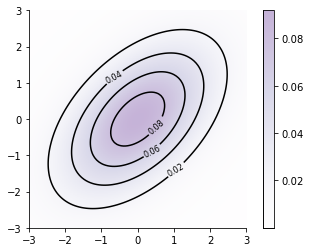

In [74]:
# Code borrowed from https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
contours = plt.contour(xx, yy, Z_prior, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_prior, extent=[-3, 3, -3, 3], origin='lower',
           cmap='Purples', alpha=0.3)
plt.colorbar();
sns.despine()

In [75]:
import matplotlib.gridspec as gridspec

In [76]:
marginal_x = dist.Normal(prior.loc[0], prior.covariance_matrix[0, 0])
marginal_y = dist.Normal(prior.loc[1], prior.covariance_matrix[1, 1])

marginal_x_vals = marginal_x.log_prob(xs).exp().numpy()
marginal_y_vals = marginal_y.log_prob(ys).exp().numpy()

<Figure size 432x288 with 0 Axes>

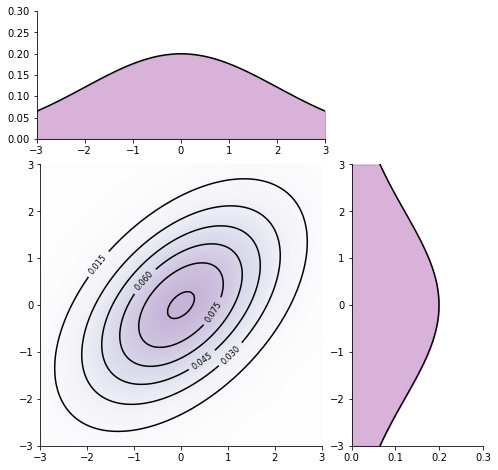

In [81]:
fig = plt.figure()


fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, Z_prior, 6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(
    Z_prior, extent=[-3, 3, -3, 3], origin="lower", cmap="Purples", alpha=0.3
)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
sns.despine();

### TODO

1. Add all content from https://nipunbatra.github.io/blog/ml/2019/08/20/Gaussian-Processes.html
2. Make the above plot better
2.1. No ticks in marginals
2.2. Add title
2.3. Better resolution (fix matplotlib rc for all book)
2.4. y marginal on LHS like seaborn and not on RHS
2.5. Ticks remove via matplotlib rc
2.6. Add colorbar
3. Show how we can get the marginal by applying a simple Affine transform (Az). A = [1 0] and [0 1]
Refer: https://www.youtube.com/watch?v=FIheKQ55l4c&t=1484s
